# Train a CNN to identify the different machine types

In [15]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import os
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [3]:
#load the dataframe that identifies which photos are good
df = pickle.load( open( "/home/ubuntu/efs/acrin_by_machine/machine_photos/df_save.pkl", "rb" ) )
df['machc'] = 0
machine_6_good = pickle.load( open( "good_6.p", "rb" ) )

In [4]:
for index, row in df.iterrows():
    if (row.fileName.split('/')[-2][-1] == '6') & (row.machc==0):
        df.iloc[index,2] = 0

In [5]:
#create a list of the train and test images from the respective directories
from glob import glob
from sklearn.model_selection import train_test_split

mach1_train = glob('/home/ubuntu/Part1/train/machine_1/*.jpg')
mach2_train = glob('/home/ubuntu/Part1/train/machine_2/*.jpg')
mach3_train = glob('/home/ubuntu/Part1/train/machine_3/*.jpg')
mach4_train = glob('/home/ubuntu/Part1/train/machine_4/*.jpg')
mach5_train = glob('/home/ubuntu/Part1/train/machine_5/*.jpg')
mach6_train = glob('/home/ubuntu/Part1/train/machine_6/*.jpg')

mach1_test = glob('/home/ubuntu/Part1/test/machine_1/*.jpg')
mach2_test = glob('/home/ubuntu/Part1/test/machine_2/*.jpg')
mach3_test = glob('/home/ubuntu/Part1/test/machine_3/*.jpg')
mach4_test = glob('/home/ubuntu/Part1/test/machine_4/*.jpg')
mach5_test = glob('/home/ubuntu/Part1/test/machine_5/*.jpg')
mach6_test = glob('/home/ubuntu/Part1/test/machine_6/*.jpg')

print('mach1_train',len(mach1_train))
print('mach2_train',len(mach2_train))
print('mach3_train',len(mach3_train))
print('mach4_train',len(mach4_train))
print('mach5_train',len(mach5_train))
print('mach6_train',len(mach6_train))

#set the train/validate/test directories
TRAIN_DIR = '/home/ubuntu/Part1/train'
VAL_DIR = '/home/ubuntu/Part1/valid'
TEST_DIR = '/home/ubuntu/Part1/test'

mach1_train 242
mach2_train 287
mach3_train 288
mach4_train 340
mach5_train 304
mach6_train 174


In [6]:
#create new column in dataframe to identify if each photo is train/valiadte/test, the full path, and just the filename
df['use']='valid'
df['path'] = 'na'
df['filename'] = 'na'

In [7]:
#use the fullpath to pick just the filename and store it in 'filename'
for index,row in df.iterrows():
    df.iloc[index,6]=row.fileName.split('/')[-1]
    df.iloc[index,5]="/".join(row.fileName.split('/')[0:-1])
df = df.set_index('filename')

In [8]:
#the 'use' column was set to 'valid' by defualt.  we then determine each file that is train and test, with the 
#remaining already being set to valid
for i in mach1_train:
    df.set_value(i.split('/')[-1], "use", "train")
for i in mach2_train:
    df.set_value(i.split('/')[-1], "use", "train")
for i in mach3_train:
    df.set_value(i.split('/')[-1], "use", "train")
for i in mach4_train:
    df.set_value(i.split('/')[-1], "use", "train")
for i in mach5_train:
    df.set_value(i.split('/')[-1], "use", "train")
for i in mach6_train:
    df.set_value(i.split('/')[-1], "use", "train")
    
for i in mach1_test:
    df.set_value(i.split('/')[-1], "use", "test")
for i in mach2_test:
    df.set_value(i.split('/')[-1], "use", "test")
for i in mach3_test:
    df.set_value(i.split('/')[-1], "use", "test")
for i in mach4_test:
    df.set_value(i.split('/')[-1], "use", "test")
for i in mach5_test:
    df.set_value(i.split('/')[-1], "use", "test")
for i in mach6_test:
    df.set_value(i.split('/')[-1], "use", "test")
 

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:12: FutureWarning: set

In [53]:
#save the new file out as a pickle
#df = df.set_index('indexx')
pickle.dump( df, open( "df_save_full.pkl", "wb" ) )

In [9]:
df.head()

,fileName,indexx,good,machc,use,path
filename,,,,,,
IMG_3819.jpg,/home/ubuntu/efs/acrin_by_machine/machine_phot...,0,1,0,train,/home/ubuntu/efs/acrin_by_machine/machine_phot...
IMG_3738.jpg,/home/ubuntu/efs/acrin_by_machine/machine_phot...,1,0,0,valid,/home/ubuntu/efs/acrin_by_machine/machine_phot...
IMG_3576.jpg,/home/ubuntu/efs/acrin_by_machine/machine_phot...,2,1,0,test,/home/ubuntu/efs/acrin_by_machine/machine_phot...
IMG_3693.jpg,/home/ubuntu/efs/acrin_by_machine/machine_phot...,3,1,0,train,/home/ubuntu/efs/acrin_by_machine/machine_phot...
IMG_3855.jpg,/home/ubuntu/efs/acrin_by_machine/machine_phot...,4,1,0,train,/home/ubuntu/efs/acrin_by_machine/machine_phot...


In [11]:
#define the CNN model using Keras and inceptionV3 as the base model that will be used for transer learning
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.applications.vgg19 import VGG19

CLASSES = 6
    
# setup model
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add more layers
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D(name='avg_pool'))

model.add(Dense(CLASSES, activation='softmax'))

   
# transfer learning - set all layers of the base model to frozen
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze the last x layers from bottom
x = 11
for layer in base_model.layers[-x:]:
     layer.trainable = True
    
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


W1214 18:02:35.772611 140432467314496 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1214 18:02:35.785471 140432467314496 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1214 18:02:35.792358 140432467314496 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1214 18:02:35.816432 140432467314496 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The n

In [12]:
#print out what layers will be unfrozen
for layer in base_model.layers:
    if layer.trainable == True:
        print(layer.name)

batch_normalization_86
activation_88
activation_89
activation_92
activation_93
batch_normalization_94
activation_86
mixed9_1
concatenate_2
activation_94
mixed10


In [13]:
#data generators that will augment the data before each batch run
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 299
HEIGHT = 299
BATCH_SIZE = 128

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0,
    zoom_range=0,
    horizontal_flip=False,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=247,
		class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=208,
    class_mode='categorical')

Found 1636 images belonging to 6 classes.
Found 202 images belonging to 6 classes.


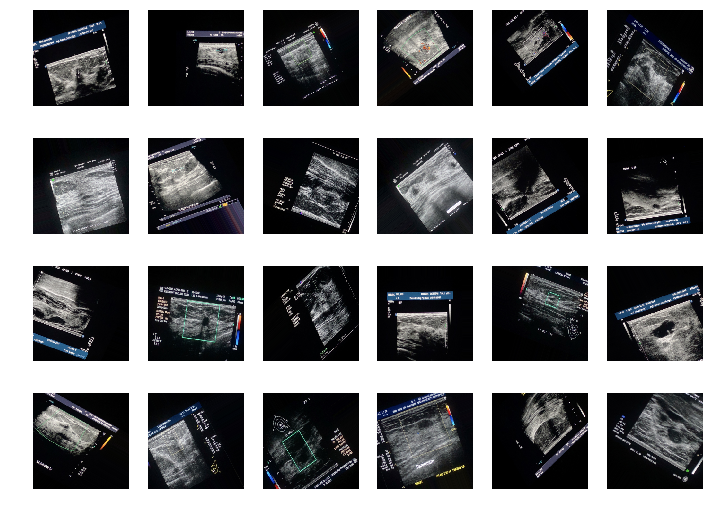

In [16]:
#print a sample of the images with augmentation
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 9))
for k, (img, lbl) in enumerate(zip(x_batch[0:24], y_batch[0:24])):
    plt.subplot(4, 6, k+1)
    plt.imshow((img + 1) / 2)
    plt.axis('off')

In [ ]:
#train the model using early stopping when it goes three epochs without the validation loss decreasing

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
EPOCHS = 25
STEPS_PER_EPOCH = 10
VALIDATION_STEPS = 1

checkpointer = ModelCheckpoint(filepath='weights_0_hdf5_deep', 
                               verbose=1, save_best_only=True)

earlyStop = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=0)


history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS,
    callbacks=[checkpointer,earlyStop])


In [21]:
#load the weights from the epoch that had the lowest validation loss
model.load_weights('saved_weights_0_hdf5')

In [ ]:
# code to clean up the working directory in case you fill it with checkpoints
###WARNING####. this will delete all checkpoints, adjust as needed
#import os
#files = os.listdir('../working')
#for file in files:
#    if file.endswith("f5"):
#        os.remove(os.path.join('../working',file))

In [18]:
#plot the training history

def plot_training(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  plt.show()
  
plot_training(history)

NameError: name 'history' is not defined

In [5]:
#Create a single test set from all of the test directories
df = pickle.load( open( "/home/ubuntu/efs/acrin_by_machine/machine_photos/df_save_full.pkl", "rb" ) )
WIDTH = 299
HEIGHT = 299
BATCH_SIZE = 128

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from PIL import Image
from keras.preprocessing import image
from keras.models import load_model
from tqdm import tqdm
import cv2

X = []
X_p = []
Y = []
files = []
image_name = []
def make_train_data(DIR,label):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        if path.endswith('.jpg'):
            img = image.load_img(path, target_size=(HEIGHT, WIDTH))
            #img_p = Image.open(path).convert('RGB')
            x = image.img_to_array(img)
            x = cv2.flip(x, 1 )
            x = cv2.flip(x, 0 )
            #x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)
            X.append(np.array(x))
            Y.append(label)
            #X_p.append(np.array(img_p))
            files.append(path)
            image_name.append(path.split('/')[-1])
make_train_data('/home/ubuntu/Part1/test/machine_1/',0)
make_train_data('/home/ubuntu/Part1/test/machine_2/',1)
make_train_data('/home/ubuntu/Part1/test/machine_3/',2)
make_train_data('/home/ubuntu/Part1/test/machine_4/',3)
make_train_data('/home/ubuntu/Part1/test/machine_5/',4)
make_train_data('/home/ubuntu/Part1/test/machine_6/',5)
print(len(X))
X=np.array(X)
#X_p=np.array(X_p)

100%|██████████| 23/23 [00:04<00:00,  5.42it/s]


209


In [6]:
X.shape

(209, 299, 299, 3)

In [22]:
import numpy as np
from sklearn.metrics import accuracy_score

predicts = model.predict(X)
predicts = np.argmax(predicts, axis=1)

accuracy_score(Y, predicts)

0.9712918660287081

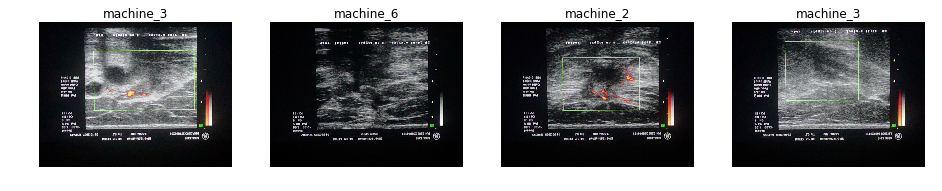

In [18]:
#show first 25 misclassified Daisies
labels = ("machine_1","machine_2","machine_3","machine_4","machine_5","machine_6")

N, R, C = 25, 5, 5
count = 0
plt.figure(figsize=(20, 30))
for k in range(len(predicts)):
    if count<25:
        if (Y[k] == 0) & (predicts[k] != 0):
            im = Image.open(files[k]).convert('RGB')
            plt.subplot(R, C, count+1)
            plt.title(labels[predicts[k]])
            plt.imshow(np.asarray(im))
            plt.axis('off')
            count = count + 1
    

In [12]:
#Function for plotting confusion matrix
# code used from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[30  0  1  0  0  0]
 [ 0 37  0  0  0  0]
 [ 0  0 35  0  2  0]
 [ 0  0  0 43  0  0]
 [ 1  0  1  0 36  0]
 [ 1  0  0  0  0 22]]


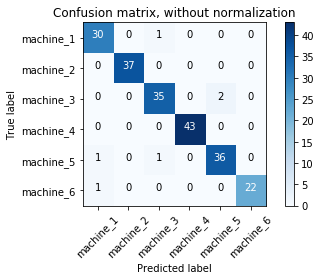

In [23]:

#Plot confusion matrix
# code used from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
labels = ("machine_1","machine_2","machine_3","machine_4","machine_5","machine_6")
cnf_matrix = confusion_matrix(Y, predicts)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='Confusion matrix, without normalization')

plt.show()